<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/MLW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("/content/Salary_Data.csv")

In [6]:
df.shape

(6704, 6)

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(1792, 6)

In [9]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)  # or median
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna('Unknown', inplace=True)
df['Job Title'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1950562688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1950562688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [11]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])
print(df.head())

        Age  Gender  Education Level  Job Title  Years of Experience    Salary
0 -0.381131       1                0        177            -0.607418 -0.449948
1 -0.868631       0                3         18            -0.900064 -0.935281
2  1.203243       1                5        145             0.855808  0.714851
3  0.106369       0                0        116            -0.314773 -1.032348
4  2.056367       1                3         26             1.587421  1.685517


In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Salary changes by 0.82 units for each additional year of experience.
Regression equation: Salary = -0.00 + 0.82 * YearsExperience


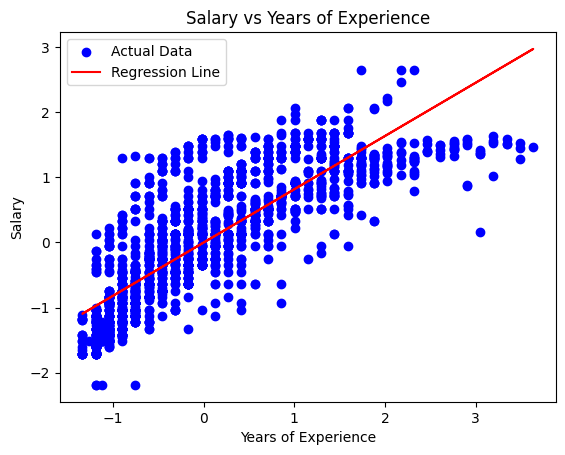

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['Years of Experience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Salary changes by {slope:.2f} units for each additional year of experience.")
print(f"Regression equation: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.show()


In [16]:
df=pd.read_csv("/content/car_price_prediction.csv")
df.shape

(50755, 16)